In [84]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

In [2]:
import warnings
warnings.filterwarnings("ignore")

!pwd

import socket
hostname = socket.gethostname()
print(hostname)

/home/hyejoo/work/repos/Capstone19/02_music
seung-BM1


In [3]:
import os
import glob
import pickle
import numpy as np
from music21 import converter, instrument, note, chord, stream
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [4]:
sequence_length = 20
sqln = 'sq'+str(sequence_length)

In [117]:
folder_name = 'minyo'

nb_epoch = 100 #
outDir = 'out'
if not os.path.exists(outDir):
    os.makedirs(outDir)

outDirMIDI = 'outMIDI'
if not os.path.exists(outDirMIDI):
    os.makedirs(outDirMIDI)
    
fnmodel = '{}/model_{}_{}.h5'.format(outDir, folder_name, nb_epoch)
#fnmodel = '{}/model_{}.h5'.format(outDir, folder_name)

In [6]:
fnmodel

'out/model_minyo_100.h5'

In [7]:
# !ls -al out/model_*

In [8]:
model = load_model(fnmodel)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 998, in emit
    self.flush()
  File "/usr/lib/python3.6/logging/__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 5] Input/output error
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asy

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 998, in emit
    self.flush()
  File "/usr/lib/python3.6/logging/__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 5] Input/output error
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asy

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 998, in emit
    self.flush()
  File "/usr/lib/python3.6/logging/__init__.py", line 978, in flush
    self.stream.flush()
OSError: [Errno 5] Input/output error
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asy

--- Logging error ---
Traceback (most recent call last):
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2639, in get_attr
    c_api.TF_OperationGetAttrValueProto(self._c_op, name, buf)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Operation 'loss/activation_1_loss/clip_by_value' has no attr named '_XlaCompile'.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py", line 398, in _MaybeCompile
    xla_compile = op.get_attr("_XlaCompile")
  File "/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2643, in get_attr
    raise ValueError(str(e))
ValueError: Operation 'loss/activation_1_loss/clip_by_value' has no attr named '_XlaCompile'.

During handling of the above exception, another exception occurred:

Traceback (most re

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 512)           1257472   
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 512)           2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

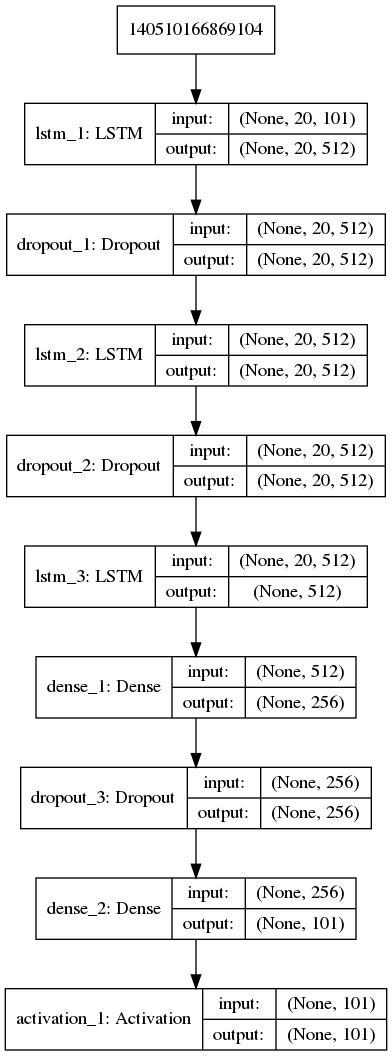

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='{}/{}_model.png'.format(outDir, folder_name), show_shapes=True)
plot_model(model, to_file='{}/{}_model.svg'.format(outDir, folder_name), show_shapes=False)
from IPython.display import Image
Image('{}/{}_model.png'.format(outDir, folder_name))

In [61]:
def GetMusic(str_input):
    out = str_input.replace('[','')
    out = out.replace(']','')
    out = out.split(',')
    return out[0], out[1]

In [11]:
pickle_name = 'notes_'+folder_name+'_'+sqln+'.pickle'
notes = pickle.load( open(pickle_name, "rb" ) )
pitchnames = sorted(set(item for item in notes))
n_vocab = (len(set(notes)))
print(n_vocab)

17


In [12]:
pickle_name_1 = 'durations_'+folder_name+'_'+sqln+'.pickle'
durations = pickle.load( open(pickle_name_1, "rb" ) )
dunames = sorted(set(item for item in durations))
n_vocab2 = (len(set(durations)))
print(n_vocab2)

15


In [13]:
pickle_name_2 = 'nodu_'+folder_name+'_'+sqln+'.pickle'
nodu = pickle.load( open(pickle_name_2, "rb" ) )
nodunames = sorted(set(str(item) for item in nodu))
n_vocab3 = (len(set(str(item) for item in nodu)))
print(n_vocab3)

101


In [14]:
pickle_name_3 = 'nodu2_'+folder_name+'_'+sqln+'.pickle'
nodu2 = pickle.load( open(pickle_name_3, "rb" ) )
nodunames2 = sorted(set(str(item) for item in nodu2))
n_vocab4 = (len(set(str(item) for item in nodu2)))
print(n_vocab4)

101


In [15]:
pickle_name1 = 'note_to_int_'+folder_name+'_'+sqln+'.pickle'
note_to_int = pickle.load( open(pickle_name1, "rb" ) )

In [16]:
pickle_name2 = 'duration_to_int_'+folder_name+'_'+sqln+'.pickle'
duration_to_int = pickle.load( open(pickle_name2, "rb" ) )

In [ ]:
pickle_name3 = 'nodu2_to_int_'+folder_name+'_'+sqln+'.pickle'
nodu2_to_int = pickle.load( open(pickle_name3, "rb" ) )

In [ ]:
n_vocab4 = (len(set(str(item) for item in nodu2)))
n_vocab4

In [119]:
# pick a random sequence from the input as a starting point for the prediction
#start = numpy.random.randint(0, len(network_input)-1)
start = 1350    #start sequence

print('0 --- {} --> {} th sequence'.format(len(network_input2)-1, start))

0 --- 2149 --> 1350 th sequence


In [121]:
pattern = network_input2[start]                #network_input[start]

In [122]:
print(pattern[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [123]:
print(np.shape(pattern))

(20, 101)


In [124]:
print(np.shape(pattern))

(20, 101)


In [125]:
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
int_to_duration = dict((number, duration) for number, duration in enumerate(dunames))
int_to_nodu2 = dict((number, nodu2) for number, nodu2 in enumerate(nodunames2))

In [128]:
pickle_name = 'network_input2.pickle'
network_input2 = pickle.load(open(pickle_name, "rb" ) )

In [127]:
st= network_input2[0]
print(st.shape)

(20, 101)


In [129]:
#prediction_input = numpy.array(st)
prediction_input = numpy.reshape(st, (1, st.shape[0], st.shape[1]))
print(prediction_input.shape)

(1, 20, 101)


In [130]:
# generate 500 notes
prediction = model.predict(prediction_input, verbose=1)

1/1 [==============================] - 0s 10ms/step


In [131]:
print(prediction.shape)

(1, 101)


In [132]:
pred_idx = np.argmax(prediction)
print(pred_idx)

28


In [133]:
pred_nodu2 = int_to_nodu2[pred_idx]
out = pred_nodu2

In [134]:
print(prediction_input, "------------>", pred_nodu2)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] ------------> ['B3', '1.0']


In [135]:
prediction_input.shape

(1, 20, 101)

In [136]:
pitch1, dur1 = GetMusic(pred_nodu2)

In [137]:
print(pitch1, dur1)

'B3'  '1.0'


In [138]:
vpitch=[]
vdur=[]

for i in range(len(st)):
    idx = np.argmax(st[i])
    nodu2 = int_to_nodu2[idx]
    pitch1, dur1 = GetMusic(nodu2)
    vpitch.append(pitch1)
    vdur.append(dur1)

prediction_input = numpy.reshape(st, (1, st.shape[0], st.shape[1]))
print(prediction_input.shape)

for i in range(500):
    
    prediction = model.predict(prediction_input, verbose=1)
    pred_idx = np.argmax(prediction)
    pred_nodu2 = int_to_nodu2[pred_idx]
    pitch1, dur1 = GetMusic(pred_nodu2)
    #print(i, pitch1, dur1)
    vpitch.append(pitch1)
    vdur.append(dur1)
    
    prediction_input = prediction_input[0, 1:, :]
    
    #print(np.shape(prediction_input))
    prediction_input = np.vstack( (prediction_input, prediction))
    
    #print(np.shape(prediction_input))
    prediction_input = numpy.reshape(prediction_input, (1, st.shape[0], st.shape[1]))
    #print(np.shape(prediction_input))

(1, 20, 101)
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step


In [110]:
vdurf = []
for i in range(len(vpitch)):
    d = vdur[i].replace("'", "")
    vpitch[i] = vpitch[i].replace("'", "")
    df = float(d)
    vdurf.append(df)
    print(vpitch[i], df)

B3 0.5
B-4 5.5
B-4 5.5
A4 1.75
A4 1.75
A4 1.25
A4 2.25
A4 1.75
F4 0.75
F4 0.75
A4 1.75
A4 1.75
A4 1.25
D4 0.5
B3 0.5
B-4 5.5
B-4 5.5
B3 0.5
B3 0.5
B-4 5.5
B3 1.0
A4 1.75
B-4 5.5
A4 1.25
A4 1.75
B3 0.5
B-4 5.5
B3 1.0
B3 0.5
B-4 5.5
B-4 5.5
A4 1.75
A4 1.75
A4 1.25
A4 2.25
A4 1.75
F4 0.75
F4 0.75
A4 1.75
A4 1.25
A4 1.25
A4 1.25
A4 2.25
B3 0.5
B-4 5.5
B-4 5.5
A4 1.75
A4 1.75
A4 1.25
A4 2.25
A4 1.75
F4 0.75
F4 0.75
A4 1.75
A4 1.25
A4 1.25
A4 1.25
A4 2.25
A4 2.25
A4 1.75
B-4 5.5
A4 1.75
F4 0.75
A4 2.25
A4 2.25
F4 1.5
F4 0.75
A4 1.75
C5 2.0
B3 1.0
A4 2.25
A4 1.75
B-4 5.5
A4 1.75
F4 0.75
A4 2.25
A4 2.25
F4 1.5
F4 0.75
A4 1.75
C5 2.0
B3 1.0
A4 2.25
A4 0.75
A4 0.5
C5 2.0
C4 2.25
F4 0.25
G4 2.5
F4 0.75
A4 0.5
C5 2.0
C4 2.25
D4 0.25
A4 1.25
A4 0.75
D4 0.25
A4 1.25
D4 0.25
C4 1.0
G4 0.25
F#4 0.5
G4 1.0
C4 0.25
G4 0.25
E4 3.0
G4 1.0
G4 0.75
C4 1.0
F#4 1.25
G4 1.0
G4 0.75
C4 1.0
F#4 1.25
C4 2.25
C4 0.25
C5 2.0
C4 0.5
D4 0.5
A4 2.25
A4 2.25
A4 2.25
A4 0.5
C5 2.0
C4 2.25
F4 1.5
F4 0.75
F4 2.0
G4 2.5
F4

In [83]:
print(np.shape(vpitch))

(520,)


In [ ]:
#[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]

### Creating a MIDI file from the predictions

In [90]:
from music21 import converter, instrument, stream, note, chord

In [ ]:
#note.Note('B-', quarterLength=0.25)

In [114]:
offset = 0
output_notes = []
for i in range(len(vpitch)):
    print(offset, vpitch[i], vdurf[i])
    
    new_note = note.Note(vpitch[i], quarterLength=vdurf[i]  ) #note.Note(vpitch[i])
    new_note.offset = offset
    #new_note.duration = vdur[i]  
     
    new_note.storedInstrument = instrument.Piano()
    
    output_notes.append(new_note)
    offset += 0.5

0 B3 0.5
0.5 B-4 5.5
1.0 B-4 5.5
1.5 A4 1.75
2.0 A4 1.75
2.5 A4 1.25
3.0 A4 2.25
3.5 A4 1.75
4.0 F4 0.75
4.5 F4 0.75
5.0 A4 1.75
5.5 A4 1.75
6.0 A4 1.25
6.5 D4 0.5
7.0 B3 0.5
7.5 B-4 5.5
8.0 B-4 5.5
8.5 B3 0.5
9.0 B3 0.5
9.5 B-4 5.5
10.0 B3 1.0
10.5 A4 1.75
11.0 B-4 5.5
11.5 A4 1.25
12.0 A4 1.75
12.5 B3 0.5
13.0 B-4 5.5
13.5 B3 1.0
14.0 B3 0.5
14.5 B-4 5.5
15.0 B-4 5.5
15.5 A4 1.75
16.0 A4 1.75
16.5 A4 1.25
17.0 A4 2.25
17.5 A4 1.75
18.0 F4 0.75
18.5 F4 0.75
19.0 A4 1.75
19.5 A4 1.25
20.0 A4 1.25
20.5 A4 1.25
21.0 A4 2.25
21.5 B3 0.5
22.0 B-4 5.5
22.5 B-4 5.5
23.0 A4 1.75
23.5 A4 1.75
24.0 A4 1.25
24.5 A4 2.25
25.0 A4 1.75
25.5 F4 0.75
26.0 F4 0.75
26.5 A4 1.75
27.0 A4 1.25
27.5 A4 1.25
28.0 A4 1.25
28.5 A4 2.25
29.0 A4 2.25
29.5 A4 1.75
30.0 B-4 5.5
30.5 A4 1.75
31.0 F4 0.75
31.5 A4 2.25
32.0 A4 2.25
32.5 F4 1.5
33.0 F4 0.75
33.5 A4 1.75
34.0 C5 2.0
34.5 B3 1.0
35.0 A4 2.25
35.5 A4 1.75
36.0 B-4 5.5
36.5 A4 1.75
37.0 F4 0.75
37.5 A4 2.25
38.0 A4 2.25
38.5 F4 1.5
39.0 F4 0.75
39.5 A4 1

In [139]:
fn_out = '{}/{}_generated_stsq{}_{}aaaaa.mid'.format(outDirMIDI, folder_name, start, sqln)
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp=fn_out)
print(fn_out)

outMIDI/minyo_generated_stsq1350_sq20aaaaa.mid
